In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
this_path = os.getcwd()
base_path = this_path.split('scripts')[0]
espec_path = base_path + 'electron_spectrum/'

In [4]:
espec_names = os.listdir(espec_path)
nums = []
espec_names_sort = []
for name in espec_names:
    num = name.split('_')[0]
    if num not in nums:
        nums.append(num)
        espec_names_sort.append([])
    ind = nums.index(num)
    espec_names_sort[ind].append(name)


In [5]:
print(espec_names_sort)

[['0001_electron_spectrum_info.txt', '0001_electron_spectrum.npy', '0001_electron_spectrum_bins.npy', '0001_electron_spectrum.pdf'], ['0002_electron_spectrum_info.txt', '0002_electron_spectrum.npy', '0002_electron_spectrum_bins.npy', '0002_electron_spectrum.pdf'], ['0003_electron_spectrum_info.txt', '0003_electron_spectrum.npy', '0003_electron_spectrum_bins.npy', '0003_electron_spectrum.pdf'], ['0004_electron_spectrum_info.txt', '0004_electron_spectrum.npy', '0004_electron_spectrum_bins.npy', '0004_electron_spectrum.pdf'], ['0005_electron_spectrum_info.txt', '0005_electron_spectrum.npy', '0005_electron_spectrum_bins.npy', '0005_electron_spectrum.pdf'], ['0006_electron_spectrum_info.txt', '0006_electron_spectrum.npy', '0006_electron_spectrum_bins.npy', '0006_electron_spectrum.pdf'], ['0007_electron_spectrum_info.txt', '0007_electron_spectrum.npy', '0007_electron_spectrum_bins.npy', '0007_electron_spectrum.pdf'], ['0008_electron_spectrum_info.txt', '0008_electron_spectrum.npy', '0008_ele

In [6]:
l = 20*[[]]
l

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [7]:
mx_ar= np.round(np.logspace(np.log10(6), np.log10(500), 20), 1)
espec_and_bins = []
for i in range(len(mx_ar)):
    espec_and_bins.append([])
for run in espec_names_sort:
    for file in run:
        if '.txt' in file:
            txt_file = open(espec_path + file, 'r')
            txt_file_read = txt_file.read()
            this_mx = np.float(txt_file_read.split('Dark Matter Particle Mass: ')[-1].split('GeV')[0])
        elif '.npy' in file:
            if 'bins.npy' in file:
                bins_name = file
            else:
                spec_name = file
    #print(this_mx)
    ind = np.where(mx_ar==this_mx)[0][0]
    #print(ind)
    #print(espec_and_bins)
    espec_and_bins[ind].append(bins_name)
    espec_and_bins[ind].append(spec_name)
print(espec_and_bins)

[['0001_electron_spectrum_bins.npy', '0001_electron_spectrum.npy'], ['0002_electron_spectrum_bins.npy', '0002_electron_spectrum.npy'], ['0003_electron_spectrum_bins.npy', '0003_electron_spectrum.npy'], ['0004_electron_spectrum_bins.npy', '0004_electron_spectrum.npy'], ['0005_electron_spectrum_bins.npy', '0005_electron_spectrum.npy'], ['0006_electron_spectrum_bins.npy', '0006_electron_spectrum.npy'], ['0007_electron_spectrum_bins.npy', '0007_electron_spectrum.npy'], ['0008_electron_spectrum_bins.npy', '0008_electron_spectrum.npy'], ['0009_electron_spectrum_bins.npy', '0009_electron_spectrum.npy'], ['0010_electron_spectrum_bins.npy', '0010_electron_spectrum.npy'], ['0011_electron_spectrum_bins.npy', '0011_electron_spectrum.npy'], ['0012_electron_spectrum_bins.npy', '0012_electron_spectrum.npy'], ['0013_electron_spectrum_bins.npy', '0013_electron_spectrum.npy'], ['0014_electron_spectrum_bins.npy', '0014_electron_spectrum.npy'], ['0015_electron_spectrum_bins.npy', '0015_electron_spectrum.n

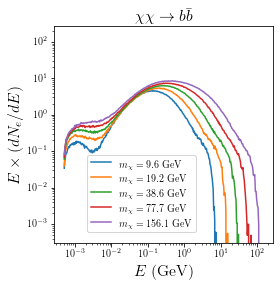

In [20]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for j in range(5):
    i = 2 + 3*j
    bins = np.load(espec_path+espec_and_bins[i][0])
    spec = np.load(espec_path+espec_and_bins[i][1])
    plt.plot(bins[0:-1], bins[0:-1]*spec, label=r'$m_\chi = ' + str(mx_ar[i]) + '\;\mathrm{GeV}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E \;\rm{(GeV)}$', size=16)
plt.ylabel(r'$E \times (dN_e/dE)$', size=16)
plt.title(r'$\chi\chi \rightarrow b\bar{b}$', size=16)
plt.legend(loc=(.15 ,0.05))
plt.axis('square')
plt.savefig(base_path + '/figs/espec_bbbar.pdf')